# Python Datetime

Python Dates

A date in Python is not a data type of its own, but we can import a module named datetime to work with dates as date objects.

In [1]:
import datetime

x = datetime.datetime.now()
print(x)

2022-12-20 02:35:06.434961


Date Output

When we execute the code from the example above the result will be:

2022-12-20 02:35:06.433961

The date contains year, month, day, hour, minute, second, and microsecond.

The datetime module has many methods to return information about the date object.

In [2]:
import datetime

x = datetime.datetime.now()

print(x.year)
print(x.strftime("%A")) 

2022
Tuesday


## Creating Date Objects

To create a date, we can use the datetime() class (constructor) of the datetime module.

The datetime() class requires three parameters to create a date: year, month, day.

In [6]:
import datetime

x = datetime.datetime(2022, 5, 17)

print(x) 

2022-05-17 00:00:00


The datetime() class also takes parameters for time and timezone (hour, minute, second, microsecond, tzone), but they are optional, and has a default value of 0, (None for timezone).

## The strftime() Method

The datetime object has a method for formatting date objects into readable strings.

The method is called strftime(), and takes one parameter, format, to specify the format of the returned string

In [5]:
import datetime

x = datetime.datetime(2022, 6, 1)

print(x.strftime("%B")) 

June


# Multithreading in Python

In computing, a process is an instance of a computer program that is being executed. Any process has 3 basic components:

    An executable program.
    
    The associated data needed by the program (variables, work space, buffers, etc.)
    
    The execution context of the program (State of process)

A thread is an entity within a process that can be scheduled for execution. Also, it is the smallest unit of processing that can be performed in an OS (Operating System). In simple words, a thread is a sequence of such instructions within a program that can be executed independently of other code. For simplicity, you can assume that a thread is simply a subset of a process! A thread contains all this information in a Thread Control Block (TCB):

    Thread Identifier: Unique id (TID) is assigned to every new thread
    
    Stack pointer: Points to thread’s stack in the process. Stack contains the local variables under thread’s scope.
    
    Program counter: a register which stores the address of the instruction currently being executed by thread.
    
    Thread state: can be running, ready, waiting, start or done.
    
    Thread’s register set: registers assigned to thread for computations.
    
    Parent process Pointer: A pointer to the Process control block (PCB) of the process that the thread lives on.

Multi-threading: Multiple threads can exist within one process where:

    1. Each thread contains its own register set and local variables (stored in stack).

    2. All threads of a process share global variables (stored in heap) and the program code.

**Multithreading** is defined as the ability of a processor to execute multiple threads concurrently.


In a simple, single-core CPU, it is achieved using frequent switching between threads. This is termed as context switching. In context switching, the state of a thread is saved and state of another thread is loaded whenever any interrupt (due to I/O or manually set) takes place. Context switching takes place so frequently that all the threads appear to be running parallelly (this is termed as **multitasking**).

In [7]:
# Python program to illustrate the concept
# of threading
# importing the threading module
import threading


def print_cube(num):
# function to print cube of given num
  print("Cube: {}" .format(num * num * num))


def print_square(num):
# function to print square of given num
  print("Square: {}" .format(num * num))


if __name__ =="__main__":
# creating thread
  t1 = threading.Thread(target=print_square, args=(10,))
  t2 = threading.Thread(target=print_cube, args=(10,))

# starting thread 1
  t1.start()
# starting thread 2
  t2.start()

# wait until thread 1 is completely executed
  t1.join()
# wait until thread 2 is completely executed
  t2.join()

# both threads completely executed
  print("Done!")

Square: 100
Cube: 1000
Done!


# State in Python



State is a behavioral design pattern that allows an object to change the behavior when its internal state changes.

The pattern extracts state-related behaviors into separate state classes and forces the original object to delegate the work to an instance of these classes, instead of acting on its own.

Usage examples: The State pattern is commonly used in Python to convert massive switch-base state machines into objects.

Identification: State pattern can be recognized by methods that change their behavior depending on the objects’ state, controlled externally.

In [8]:
from __future__ import annotations
from abc import ABC, abstractmethod


class Context:
    """
    The Context defines the interface of interest to clients. It also maintains
    a reference to an instance of a State subclass, which represents the current
    state of the Context.
    """

    _state = None
    """
    A reference to the current state of the Context.
    """

    def __init__(self, state: State) -> None:
        self.transition_to(state)

    def transition_to(self, state: State):
        """
        The Context allows changing the State object at runtime.
        """

        print(f"Context: Transition to {type(state).__name__}")
        self._state = state
        self._state.context = self

    """
    The Context delegates part of its behavior to the current State object.
    """

    def request1(self):
        self._state.handle1()

    def request2(self):
        self._state.handle2()


class State(ABC):
    """
    The base State class declares methods that all Concrete State should
    implement and also provides a backreference to the Context object,
    associated with the State. This backreference can be used by States to
    transition the Context to another State.
    """

    @property
    def context(self) -> Context:
        return self._context

    @context.setter
    def context(self, context: Context) -> None:
        self._context = context

    @abstractmethod
    def handle1(self) -> None:
        pass

    @abstractmethod
    def handle2(self) -> None:
        pass


"""
Concrete States implement various behaviors, associated with a state of the
Context.
"""


class ConcreteStateA(State):
    def handle1(self) -> None:
        print("ConcreteStateA handles request1.")
        print("ConcreteStateA wants to change the state of the context.")
        self.context.transition_to(ConcreteStateB())

    def handle2(self) -> None:
        print("ConcreteStateA handles request2.")


class ConcreteStateB(State):
    def handle1(self) -> None:
        print("ConcreteStateB handles request1.")

    def handle2(self) -> None:
        print("ConcreteStateB handles request2.")
        print("ConcreteStateB wants to change the state of the context.")
        self.context.transition_to(ConcreteStateA())


if __name__ == "__main__":
    # The client code.

    context = Context(ConcreteStateA())
    context.request1()
    context.request2()

Context: Transition to ConcreteStateA
ConcreteStateA handles request1.
ConcreteStateA wants to change the state of the context.
Context: Transition to ConcreteStateB
ConcreteStateB handles request2.
ConcreteStateB wants to change the state of the context.
Context: Transition to ConcreteStateA


# Instance Method

Instance attributes are those attributes that are not shared by objects. Every object has its own copy of the instance attribute.

For example, consider a class shapes that have many objects like circle, square, triangle, etc. having its own attributes and methods. An instance attribute refers to the properties of that particular object like edge of the triangle being 3, while the edge of the square can be 4.

An instance method can access and even modify the value of attributes of an instance. It has one default parameter:-

    1. self – It is a keyword which points to the current passed instance. But it need not be passed every time while calling an instance method.

In [9]:
# Python program to demonstrate
# instance methods
class shape:

# Calling Constructor
  def __init__(self, edge, color):
    self.edge = edge
    self.color = color

# Instance Method
  def finEdges(self):
    return self.edge

# Instance Method
  def modifyEdges(self, newedge):
    self.edge = newedge

# Driver Code
circle = shape(0, 'red')
square = shape(4, 'blue')

# Calling Instance Method
print("No. of edges for circle: "+ str(circle.finEdges()))

# Calling Instance Method
square.modifyEdges(6)
print("No. of edges for square: "+ str(square.finEdges()))

No. of edges for circle: 0
No. of edges for square: 6


#Python Methods

1. List Methods

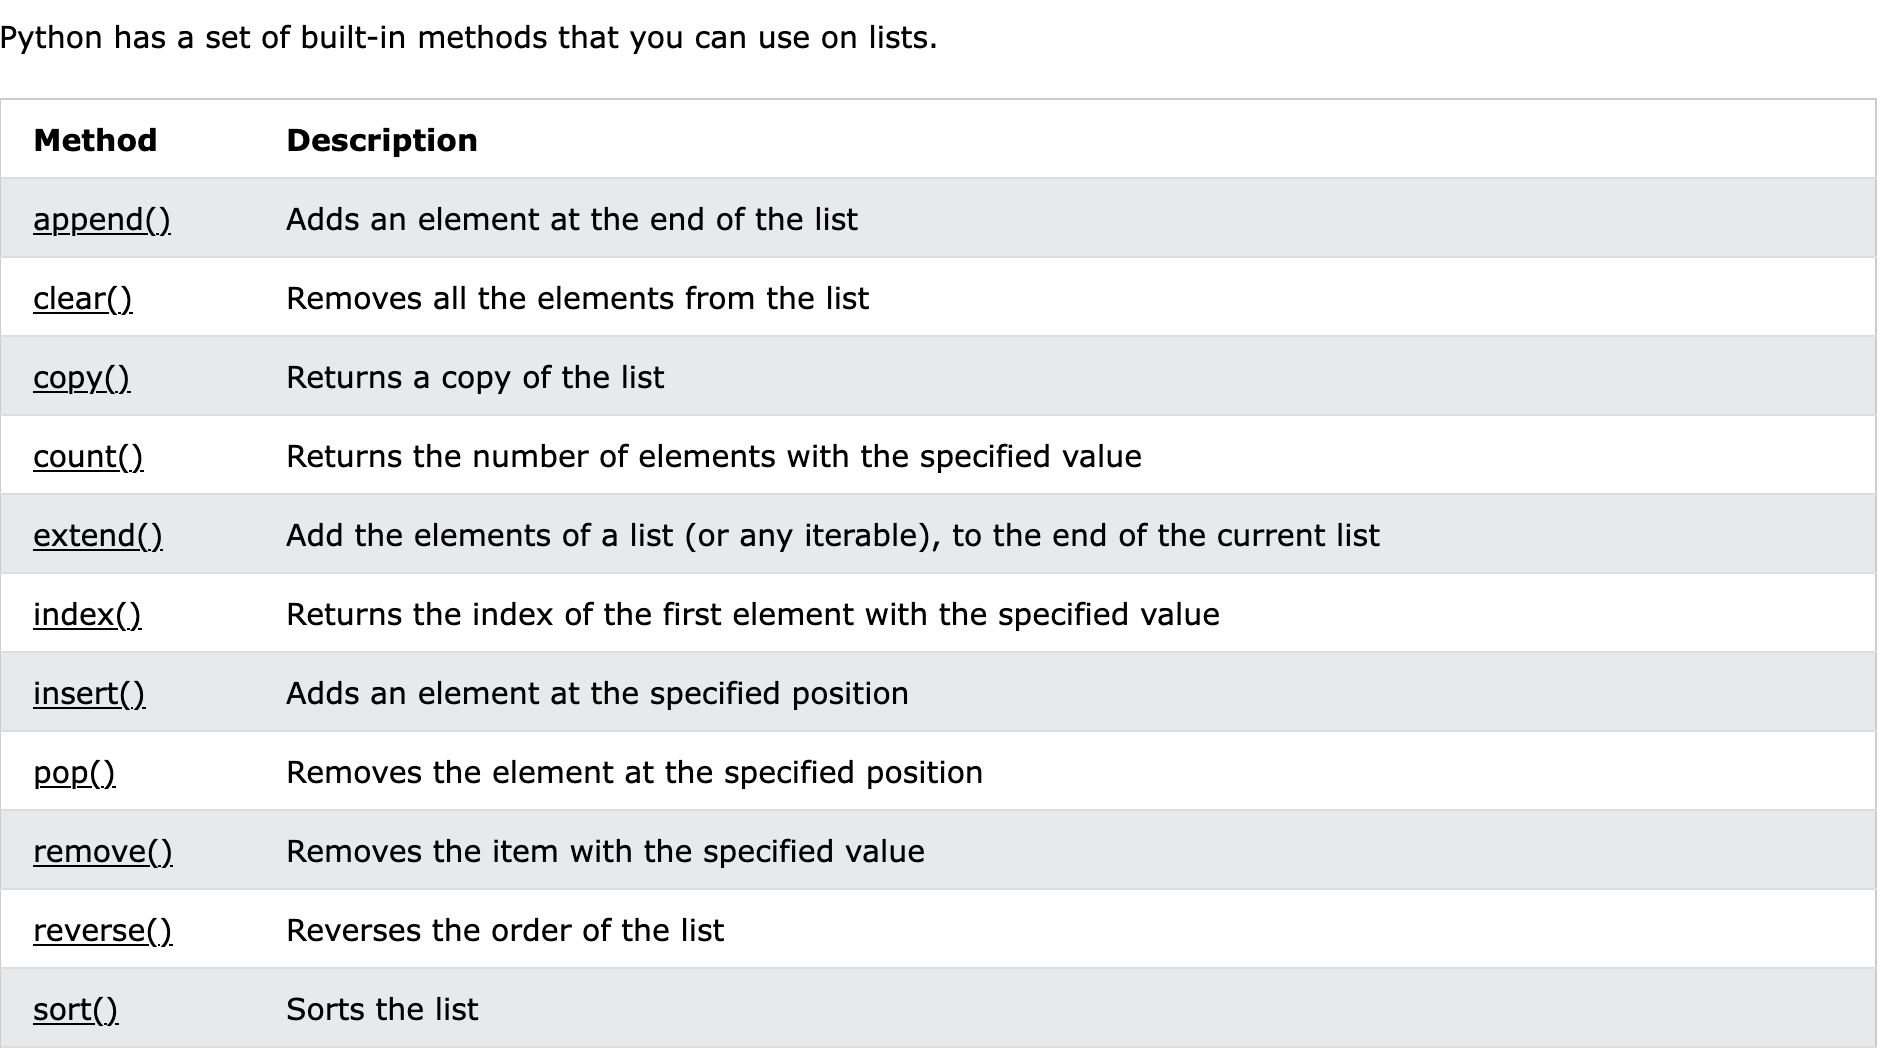

2. Set Methods
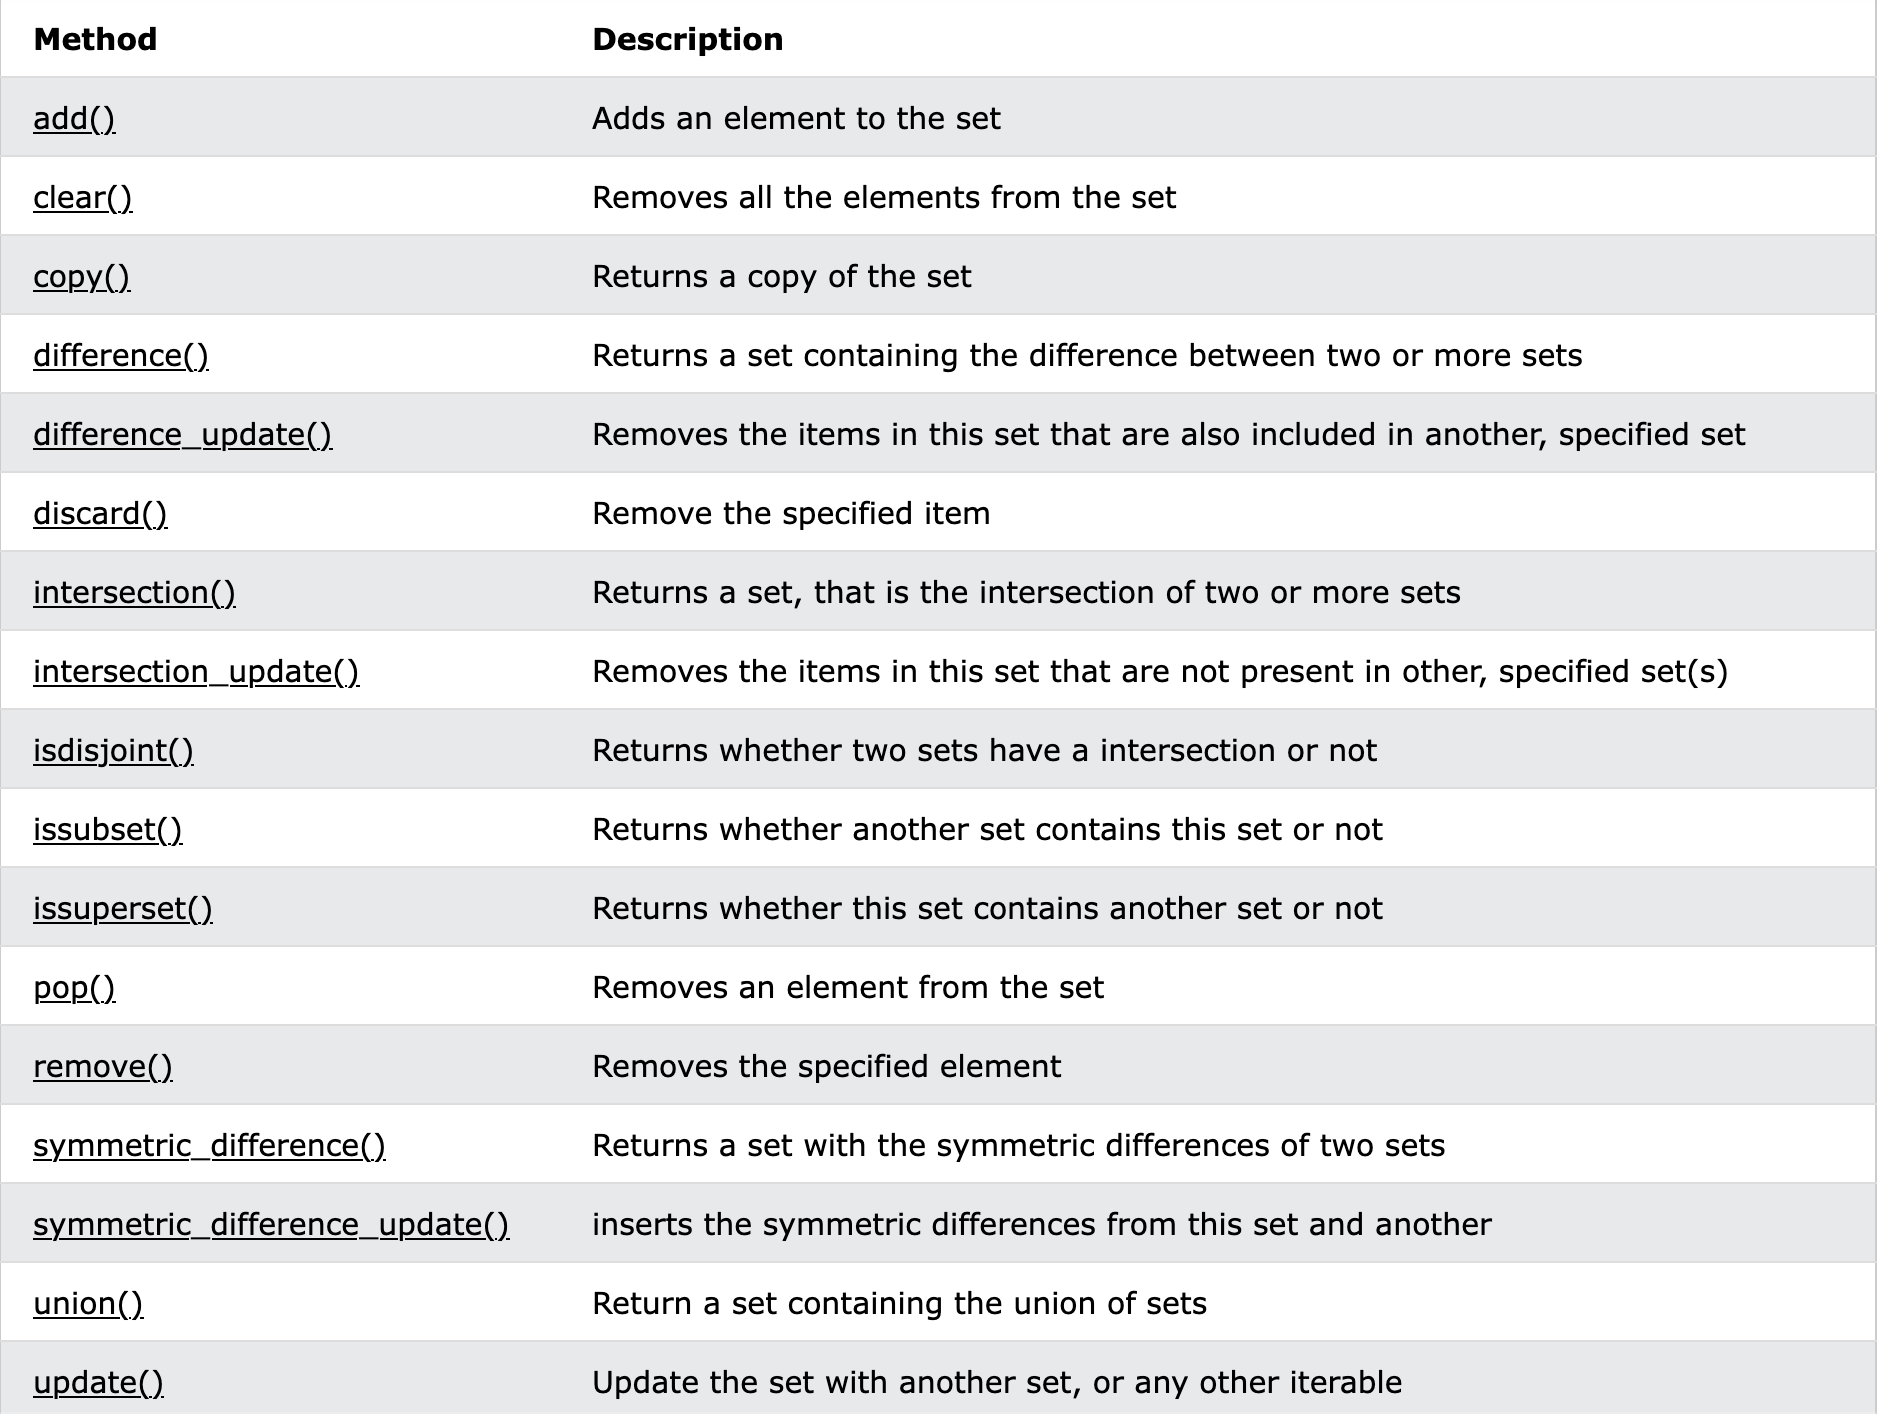

3. Dictonary Methods
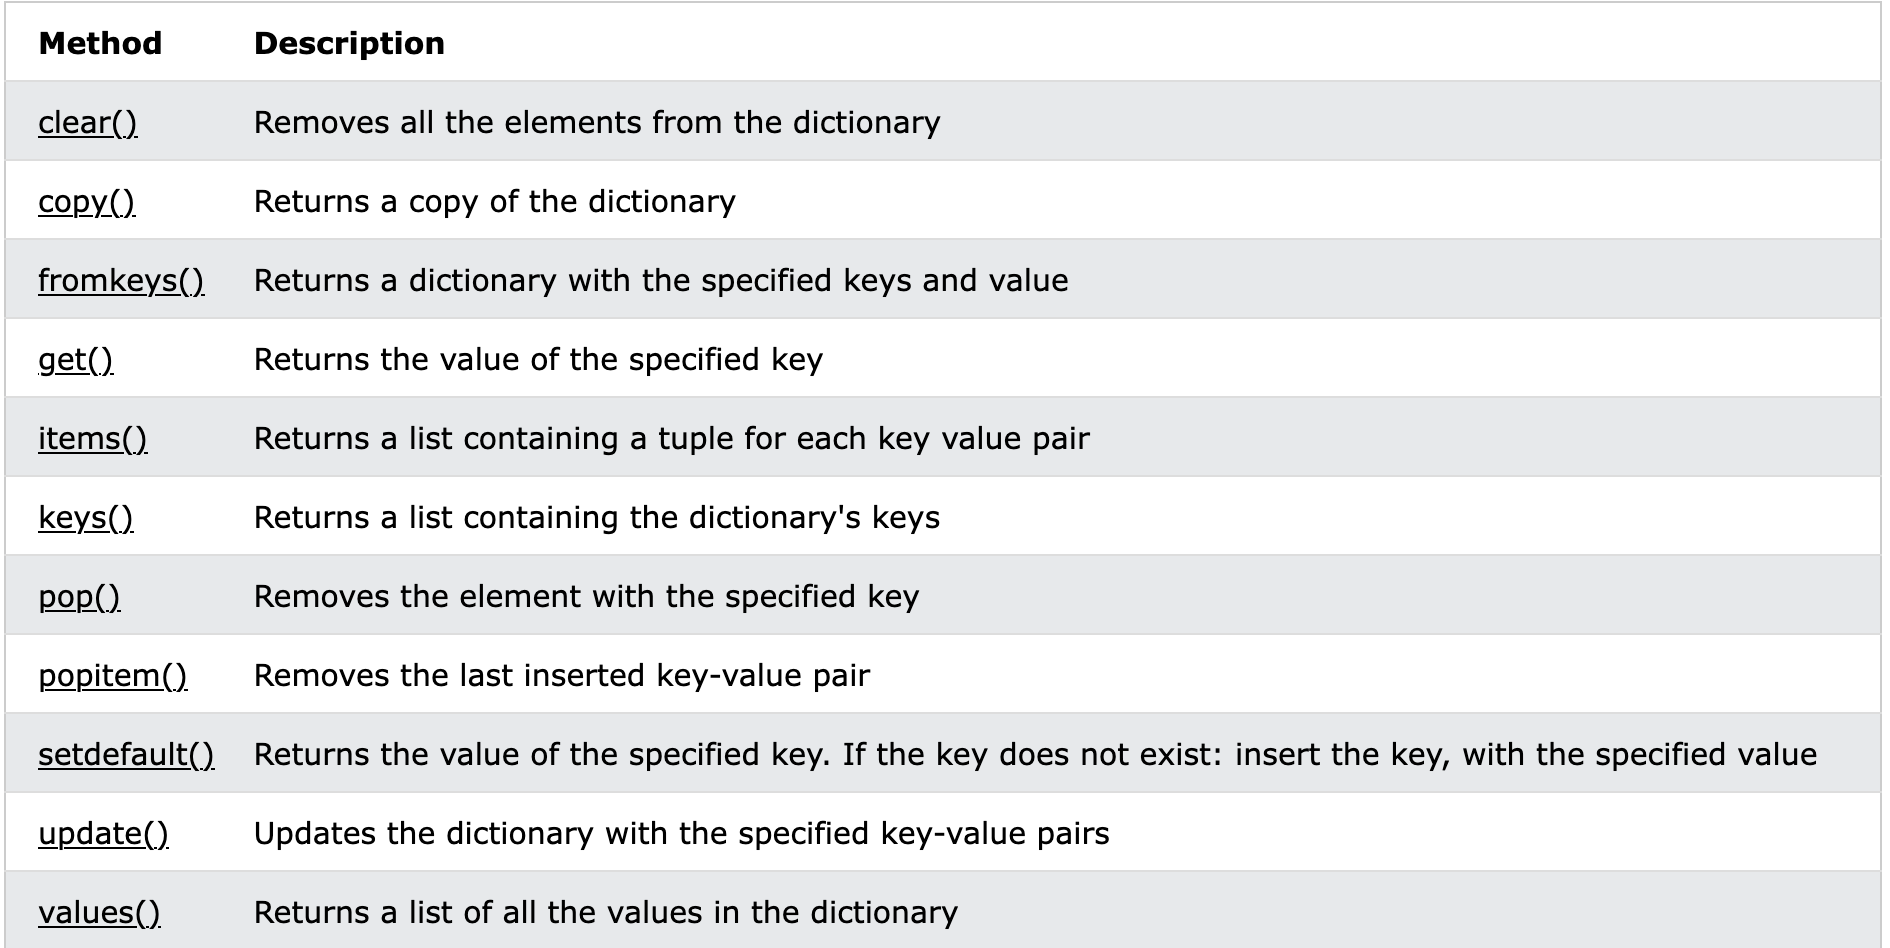